# Breast Cancer Detection - CRISP-DM Project

## 1. Business Understanding
**Objective:** Predict malignant vs benign breast tumors from the provided dataset (`data.csv`).
**Success Criteria:** High Recall for Malignant class (minimize false negatives) and high ROC-AUC.

## 2. Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, roc_curve, 
                            accuracy_score, recall_score, precision_score, f1_score, 
                            precision_recall_curve, make_scorer)
from imblearn.over_sampling import SMOTE
import joblib
import os
import json

sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 100

In [2]:
# Load data
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### 2.2 Dataset Overview


In [4]:
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Describe
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### 2.1 Feature Structure Analysis

**Understanding the 30 Features:**

The dataset contains **30 features** derived from **10 base measurements**, each with **3 statistical aggregations**:

- **Mean (_mean)**: Average value across all cells in the image
- **Standard Error (_se)**: Standard error of the mean (measurement variability)
- **Worst (_worst)**: Largest (worst) value found among all cells

**Base Features (10):**
1. radius
2. texture  
3. perimeter
4. area
5. smoothness
6. compactness
7. concavity
8. concave points
9. symmetry
10. fractal_dimension

**Why these statistics matter:**
- **Mean**: Captures typical/representative cell characteristics
- **SE**: Indicates consistency/variability (high SE = more heterogeneous tumor)
- **Worst**: Captures the most extreme/malignant characteristics (often most predictive)

**Note:** We don't have raw pixel-level data - these are already aggregated statistics from image analysis.


In [6]:
df.isnull().sum().sum()

np.int64(569)

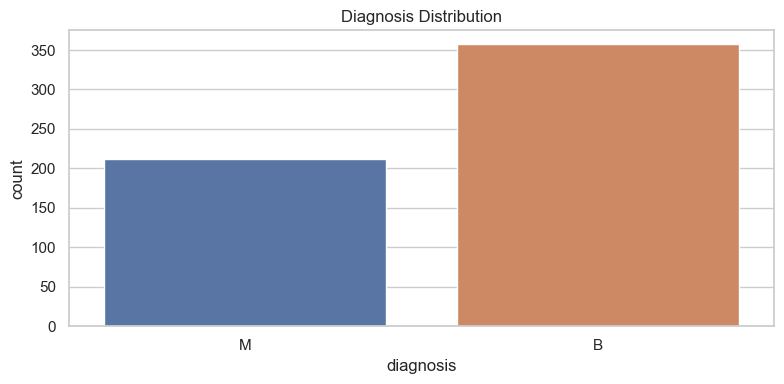

diagnosis
B    357
M    212
Name: count, dtype: int64

In [7]:
os.makedirs('results/plots', exist_ok=True)

plt.figure(figsize=(8, 4))
diagnosis_counts = df['diagnosis'].value_counts()
sns.countplot(x='diagnosis', data=df, hue='diagnosis', legend=False)
plt.title('Diagnosis Distribution')
plt.tight_layout()
plt.savefig('results/plots/class_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

diagnosis_counts

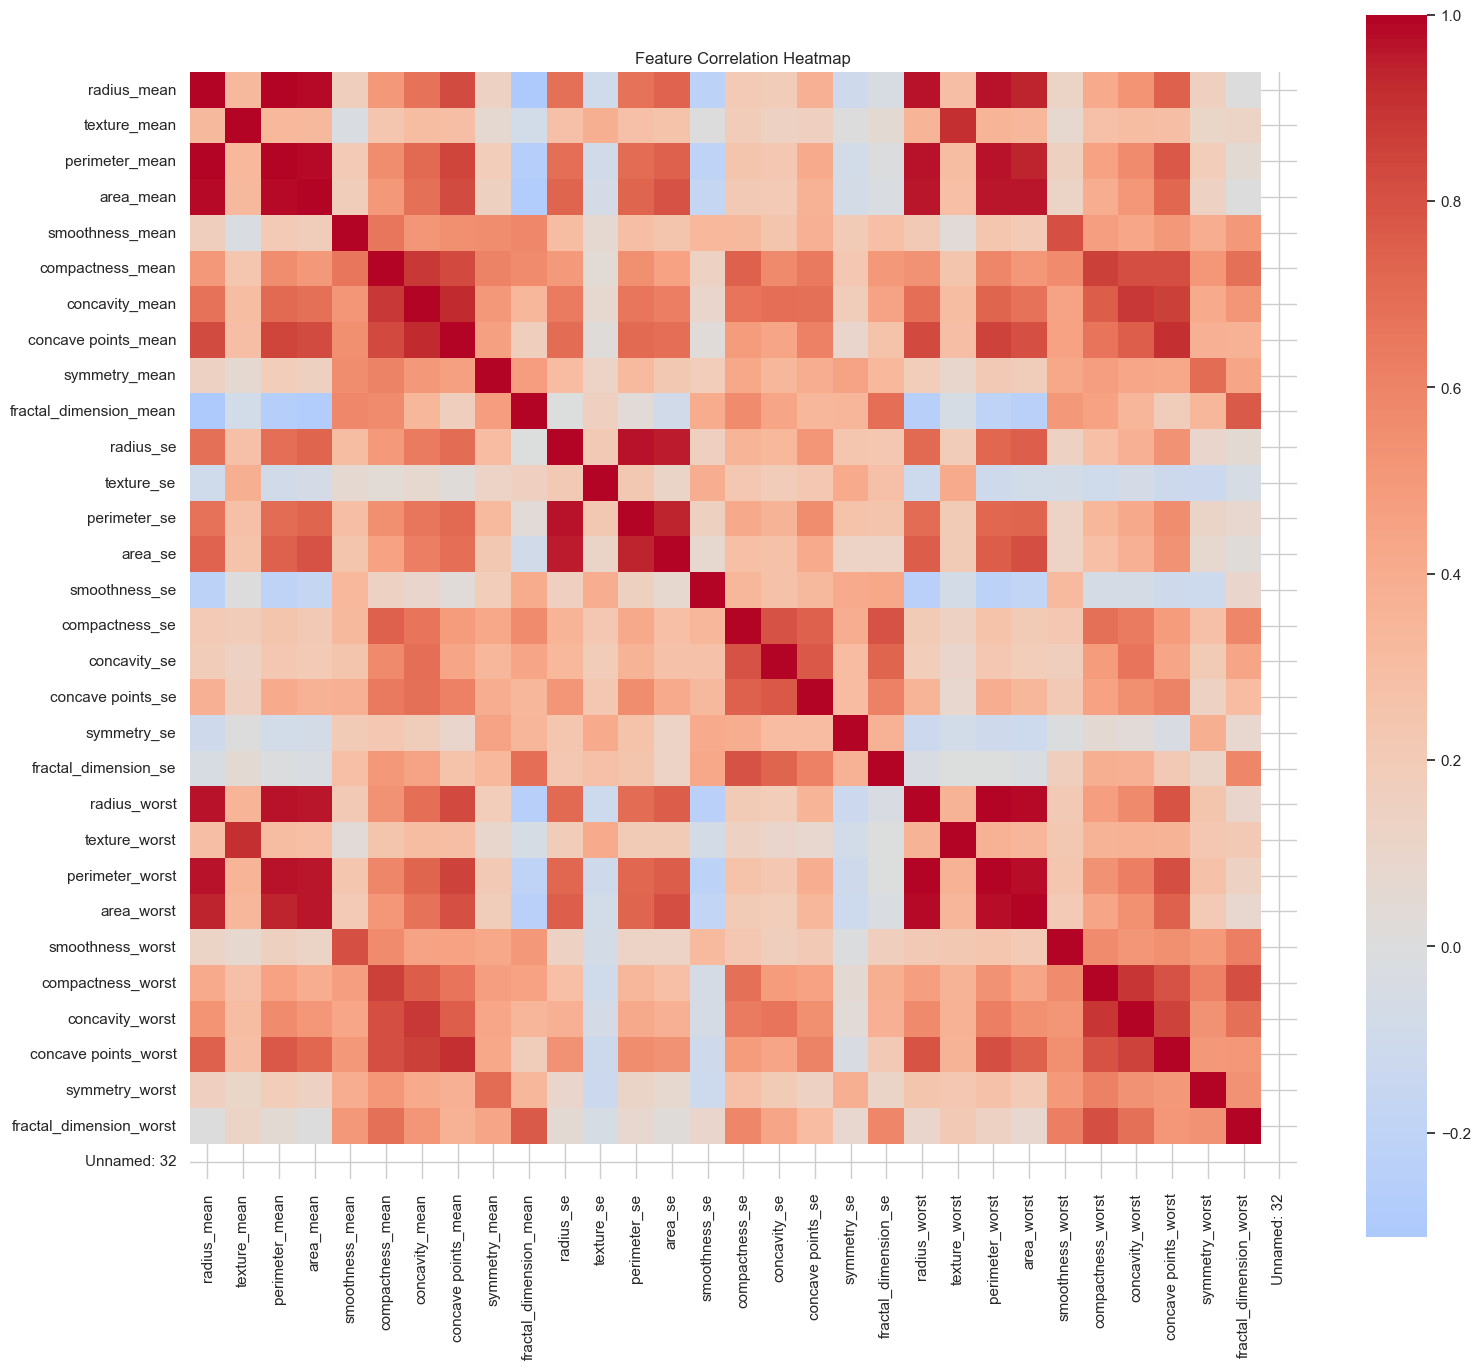

In [8]:
numeric_df = df.select_dtypes(include=[np.number]).drop(['id', 'diagnosis'], axis=1, errors='ignore')

plt.figure(figsize=(16, 14))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm', center=0, square=True)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.savefig('results/plots/correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

## 3. Data Preparation

### 3.1 Data Cleaning

In [9]:
df = df.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')

le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

print(f"Class distribution before resampling:")
print(f"  Train - Benign: {np.bincount(y_train)[0]}, Malignant: {np.bincount(y_train)[1]}")
print(f"  Imbalance ratio: {np.bincount(y_train)[0] / np.bincount(y_train)[1]:.2f}:1")

from sklearn.feature_selection import SelectKBest, f_classif

rf_temp = RandomForestClassifier(n_estimators=50, random_state=42)
rf_temp.fit(X_train, y_train)
feature_importance = pd.Series(rf_temp.feature_importances_, index=X_train.columns).sort_values(ascending=False)
top_features = feature_importance.head(20).index.tolist()

X_train_selected = X_train[top_features]
X_val_selected = X_val[top_features]
X_test_selected = X_test[top_features]

print(f"Selected top {len(top_features)} features based on Random Forest importance")
print(f"Top 5 features: {top_features[:5]}")

smote = SMOTE(random_state=42, sampling_strategy=0.85)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_selected, y_train)

print(f"\nClass distribution after SMOTE:")
print(f"  Train - Benign: {np.bincount(y_train_balanced)[0]}, Malignant: {np.bincount(y_train_balanced)[1]}")
print(f"  Imbalance ratio: {np.bincount(y_train_balanced)[0] / np.bincount(y_train_balanced)[1]:.2f}:1")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_val_scaled = scaler.transform(X_val_selected)
X_test_scaled = scaler.transform(X_test_selected)

os.makedirs('data_processed', exist_ok=True)
df.to_csv('data_processed/data_clean.csv', index=False)

Class distribution before resampling:
  Train - Benign: 214, Malignant: 127
  Imbalance ratio: 1.69:1
Selected top 20 features based on Random Forest importance
Top 5 features: ['concave points_worst', 'concavity_mean', 'perimeter_worst', 'concave points_mean', 'area_worst']

Class distribution after SMOTE:
  Train - Benign: 214, Malignant: 181
  Imbalance ratio: 1.18:1


## 4. Modeling

In [10]:
base_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'MLP': MLPClassifier(random_state=42, max_iter=1000, early_stopping=True, validation_fraction=0.1, n_iter_no_change=20)
}

param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
    'Random Forest': {'n_estimators': [50, 100], 'max_depth': [3, 5], 'min_samples_split': [10, 20], 'min_samples_leaf': [4, 8]},
    'SVM': {'C': [0.1, 1], 'gamma': ['scale', 0.01], 'kernel': ['rbf', 'linear']},
    'MLP': {'hidden_layer_sizes': [(50,), (30,), (40,)], 'alpha': [0.01, 0.1, 0.5], 'learning_rate': ['constant', 'adaptive'], 'learning_rate_init': [0.001, 0.01]}
}

results = {}
os.makedirs('results', exist_ok=True)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
recall_scorer = make_scorer(recall_score, pos_label=1)

for name, base_model in base_models.items():
    search = GridSearchCV if name in ['Logistic Regression', 'SVM'] else RandomizedSearchCV
    n_iter = None if name in ['Logistic Regression', 'SVM'] else 20
    
    params = {'cv': cv, 'scoring': 'roc_auc', 'n_jobs': -1, 'verbose': 0}
    if n_iter:
        params['n_iter'] = n_iter
        params['random_state'] = 42
    
    best_model = search(base_model, param_grids[name], **params).fit(X_train_scaled, y_train_balanced).best_estimator_
    
    cv_roc = cross_val_score(best_model, X_train_scaled, y_train_balanced, cv=cv, scoring='roc_auc')
    cv_recall = cross_val_score(best_model, X_train_scaled, y_train_balanced, cv=cv, scoring=recall_scorer)
    cv_acc = cross_val_score(best_model, X_train_scaled, y_train_balanced, cv=cv, scoring='accuracy')
    
    y_val_proba = best_model.predict_proba(X_val_scaled)[:, 1]
    y_val_pred = best_model.predict(X_val_scaled)
    
    results[name] = {
        'Model': best_model,
        'CV_ROC_AUC_mean': float(cv_roc.mean()),
        'CV_ROC_AUC_std': float(cv_roc.std()),
        'CV_Recall_mean': float(cv_recall.mean()),
        'CV_Recall_std': float(cv_recall.std()),
        'CV_Accuracy_mean': float(cv_acc.mean()),
        'CV_Accuracy_std': float(cv_acc.std()),
        'Val_Accuracy': float(accuracy_score(y_val, y_val_pred)),
        'Val_ROC_AUC': float(roc_auc_score(y_val, y_val_proba)),
        'Val_Recall': float(recall_score(y_val, y_val_pred, pos_label=1)),
        'Val_Precision': float(precision_score(y_val, y_val_pred, pos_label=1)),
        'Val_F1': float(f1_score(y_val, y_val_pred, pos_label=1))
    }
    
    with open(f'results/{name.replace(" ", "_")}_results.json', 'w') as f:
        json.dump({
            'model_name': name,
            'cross_validation': {
                'roc_auc': {'mean': float(cv_roc.mean()), 'std': float(cv_roc.std())},
                'recall': {'mean': float(cv_recall.mean()), 'std': float(cv_recall.std())},
                'accuracy': {'mean': float(cv_acc.mean()), 'std': float(cv_acc.std())}
            },
            'validation_set': {
                'accuracy': results[name]['Val_Accuracy'],
                'roc_auc': results[name]['Val_ROC_AUC'],
                'recall': results[name]['Val_Recall'],
                'precision': results[name]['Val_Precision'],
                'f1_score': results[name]['Val_F1']
            }
        }, f, indent=2)

c:\Users\Hazem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


### 4.1 Overfitting Verification


In [11]:
print("Overfitting Check: Train vs Validation Performance\n")
print(f"{'Model':<20} {'Train Acc':<12} {'Val Acc':<12} {'Gap':<10} {'Status':<15}")
print("-" * 75)

overfitting_warnings = []

for name, result in results.items():
    model = result['Model']
    
    y_train_pred = model.predict(X_train_scaled)
    y_val_pred = model.predict(X_val_scaled)
    
    train_acc = accuracy_score(y_train_balanced, y_train_pred)
    val_acc = result['Val_Accuracy']
    gap = train_acc - val_acc
    
    if train_acc >= 0.99:
        status = "⚠️ High Train"
        overfitting_warnings.append(name)
    elif abs(gap) < 0.03:
        status = "✅ Good"
    elif gap > 0.05:
        status = "⚠️ Overfitting"
        overfitting_warnings.append(name)
    else:
        status = "⚠️ Watch"
    
    print(f"{name:<20} {train_acc:<12.4f} {val_acc:<12.4f} {gap:>+9.4f} {status:<15}")

print("\nInterpretation:")
print("  ✅ Good: Gap < 0.03 (3%) - model generalizes well")
print("  ⚠️ High Train: Train accuracy ≥ 99% - may be overfitting even with small gap")
print("  ⚠️ Watch: Gap 3-5% - monitor closely")
print("  ⚠️ Overfitting: Gap > 5% or Train >> Val - model memorizes training data")

if overfitting_warnings:
    print(f"\n⚠️ WARNING: {len(overfitting_warnings)} model(s) show signs of overfitting:")
    for model_name in overfitting_warnings:
        print(f"   - {model_name}: Consider increasing regularization or reducing complexity")
    print("\nRecommendations:")
    print("  - Increase regularization (higher C penalty for LR/SVM, higher alpha for MLP)")
    print("  - Reduce model complexity (fewer trees, lower max_depth for RF)")
    print("  - Use feature selection to reduce dimensionality")
    print("  - Consider early stopping or dropout for neural networks")
else:
    print("\n✅ No significant overfitting detected - models generalize well")


Overfitting Check: Train vs Validation Performance

Model                Train Acc    Val Acc      Gap        Status         
---------------------------------------------------------------------------
Logistic Regression  0.9772       0.9737         +0.0035 ✅ Good         
Random Forest        0.9797       0.9561         +0.0236 ✅ Good         
SVM                  0.9772       0.9825         -0.0052 ✅ Good         
MLP                  0.9494       0.9474         +0.0020 ✅ Good         

Interpretation:
  ✅ Good: Gap < 0.03 (3%) - model generalizes well
  ⚠️ High Train: Train accuracy ≥ 99% - may be overfitting even with small gap
  ⚠️ Watch: Gap 3-5% - monitor closely
  ⚠️ Overfitting: Gap > 5% or Train >> Val - model memorizes training data

✅ No significant overfitting detected - models generalize well


## 5. Evaluation

### 5.1 Feature Importance Analysis

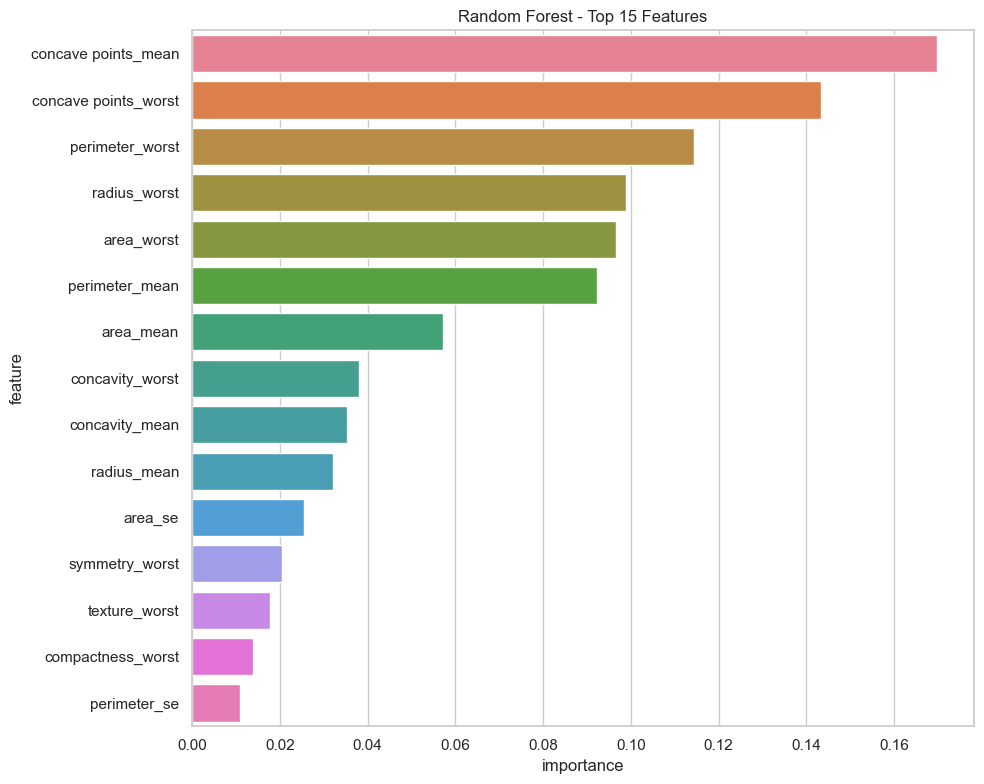

In [12]:
for name, result in results.items():
    model = result['Model']
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': top_features,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        plt.figure(figsize=(10, 8))
        sns.barplot(data=feature_importance.head(15), x='importance', y='feature', hue='feature', legend=False)
        plt.title(f'{name} - Top 15 Features')
        plt.tight_layout()
        plt.savefig(f'results/plots/{name.replace(" ", "_")}_feature_importance.png', dpi=150, bbox_inches='tight')
        plt.show()
        
        with open(f'results/{name.replace(" ", "_")}_feature_importance.json', 'w') as f:
            json.dump({'model': name, 'top_features': feature_importance.head(20).to_dict('records')}, f, indent=2)

### 5.2 Threshold Optimization for Recall


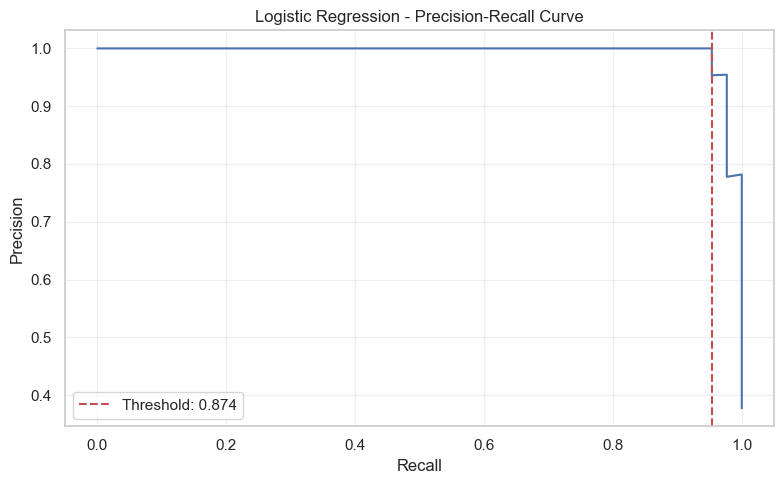

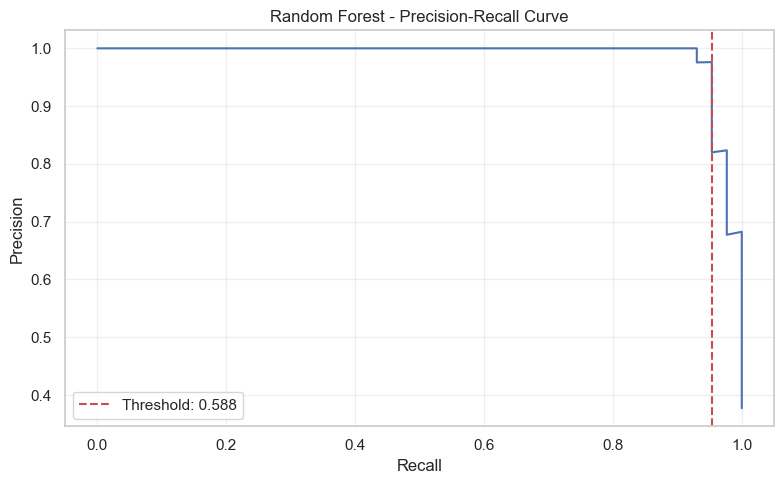

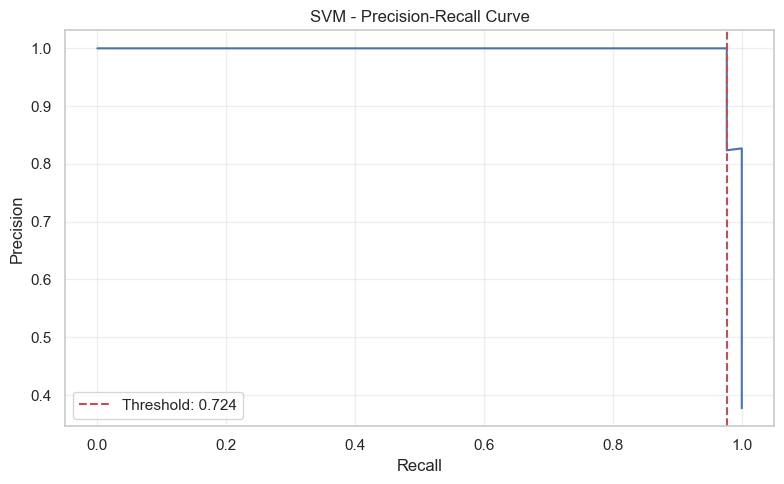

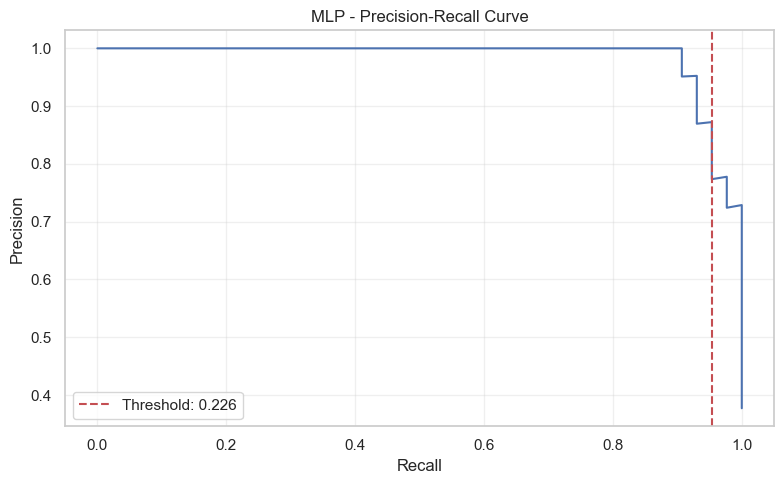

In [13]:
optimal_thresholds = {}

for name, result in results.items():
    model = result['Model']
    y_val_proba = model.predict_proba(X_val_scaled)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_val, y_val_proba)
    
    valid_indices = np.where(recall >= 0.95)[0]
    best_idx = valid_indices[np.argmax(precision[valid_indices])] if len(valid_indices) > 0 else np.argmax(recall)
    optimal_threshold = thresholds[best_idx] if best_idx < len(thresholds) else (thresholds[-1] if len(thresholds) > 0 else 0.5)
    
    optimal_thresholds[name] = optimal_threshold
    
    plt.figure(figsize=(8, 5))
    plt.plot(recall, precision)
    plt.axvline(x=recall[best_idx], color='r', linestyle='--', label=f'Threshold: {optimal_threshold:.3f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{name} - Precision-Recall Curve')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'results/plots/{name.replace(" ", "_")}_precision_recall.png', dpi=150, bbox_inches='tight')
    plt.show()

with open('results/optimal_thresholds.json', 'w') as f:
    json.dump(optimal_thresholds, f, indent=2)


### 5.3 Model Evaluation on Test Set with Optimal Thresholds


In [14]:
test_results = {}

for name, result in results.items():
    model = result['Model']
    optimal_threshold = optimal_thresholds[name]
    y_test_proba = model.predict_proba(X_test_scaled)[:, 1]
    y_test_pred_default = model.predict(X_test_scaled)
    y_test_pred_optimal = (y_test_proba >= optimal_threshold).astype(int)
    
    metrics_default = {
        'accuracy': accuracy_score(y_test, y_test_pred_default),
        'roc_auc': roc_auc_score(y_test, y_test_proba),
        'recall': recall_score(y_test, y_test_pred_default, pos_label=1),
        'precision': precision_score(y_test, y_test_pred_default, pos_label=1),
        'f1_score': f1_score(y_test, y_test_pred_default, pos_label=1)
    }
    
    metrics_optimal = {
        'accuracy': accuracy_score(y_test, y_test_pred_optimal),
        'roc_auc': roc_auc_score(y_test, y_test_proba),
        'recall': recall_score(y_test, y_test_pred_optimal, pos_label=1),
        'precision': precision_score(y_test, y_test_pred_optimal, pos_label=1),
        'f1_score': f1_score(y_test, y_test_pred_optimal, pos_label=1)
    }
    
    test_results[name] = {
        'default_threshold': metrics_default,
        'optimal_threshold': metrics_optimal,
        'optimal_threshold_value': float(optimal_threshold)
    }
    
    results[name].update({
        'Test_Accuracy_default': metrics_default['accuracy'],
        'Test_ROC_AUC': metrics_default['roc_auc'],
        'Test_Recall_default': metrics_default['recall'],
        'Test_Precision_default': metrics_default['precision'],
        'Test_F1_default': metrics_default['f1_score'],
        'Test_Accuracy_optimal': metrics_optimal['accuracy'],
        'Test_Recall_optimal': metrics_optimal['recall'],
        'Test_Precision_optimal': metrics_optimal['precision'],
        'Test_F1_optimal': metrics_optimal['f1_score']
    })

with open('results/test_results.json', 'w') as f:
    json.dump(test_results, f, indent=2)


### 5.4 Confusion Matrix Visualization


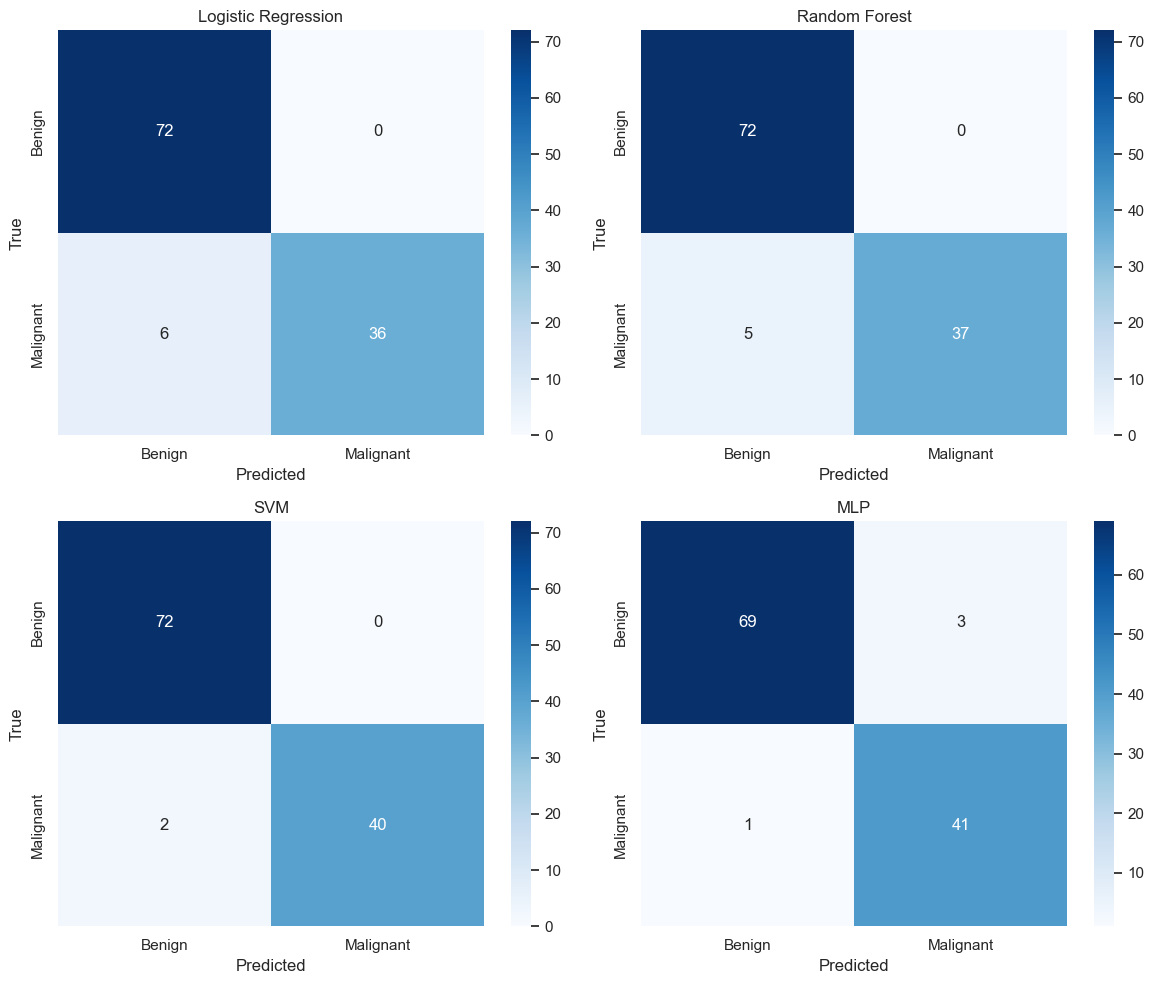

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, (name, result) in enumerate(results.items()):
    model = result['Model']
    y_test_proba = model.predict_proba(X_test_scaled)[:, 1]
    y_test_pred = (y_test_proba >= optimal_thresholds[name]).astype(int)
    cm = confusion_matrix(y_test, y_test_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    axes[idx].set_title(f'{name}')
    axes[idx].set_ylabel('True')
    axes[idx].set_xlabel('Predicted')

plt.tight_layout()
plt.savefig('results/plots/confusion_matrices.png', dpi=150, bbox_inches='tight')
plt.show()


### 5.5 ROC Curves Comparison


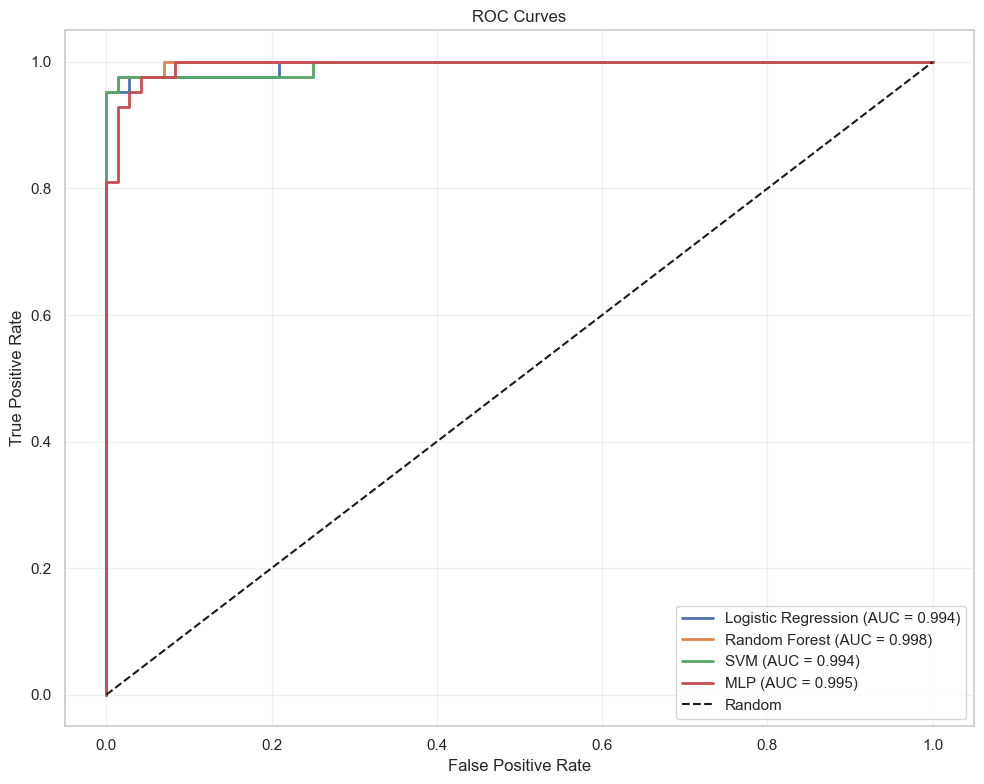

In [16]:
plt.figure(figsize=(10, 8))
for name, result in results.items():
    model = result['Model']
    y_test_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})", linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('results/plots/roc_curves.png', dpi=150, bbox_inches='tight')
plt.show()


### 5.6 Model Comparison Summary


              Model      CV ROC-AUC Test ROC-AUC Test Recall Test Precision Test F1
Logistic Regression 0.9955 ± 0.0048       0.9944      0.8571         1.0000  0.9231
      Random Forest 0.9894 ± 0.0050       0.9980      0.8810         1.0000  0.9367
                SVM 0.9942 ± 0.0034       0.9937      0.9524         1.0000  0.9756
                MLP 0.9925 ± 0.0023       0.9947      0.9762         0.9318  0.9535


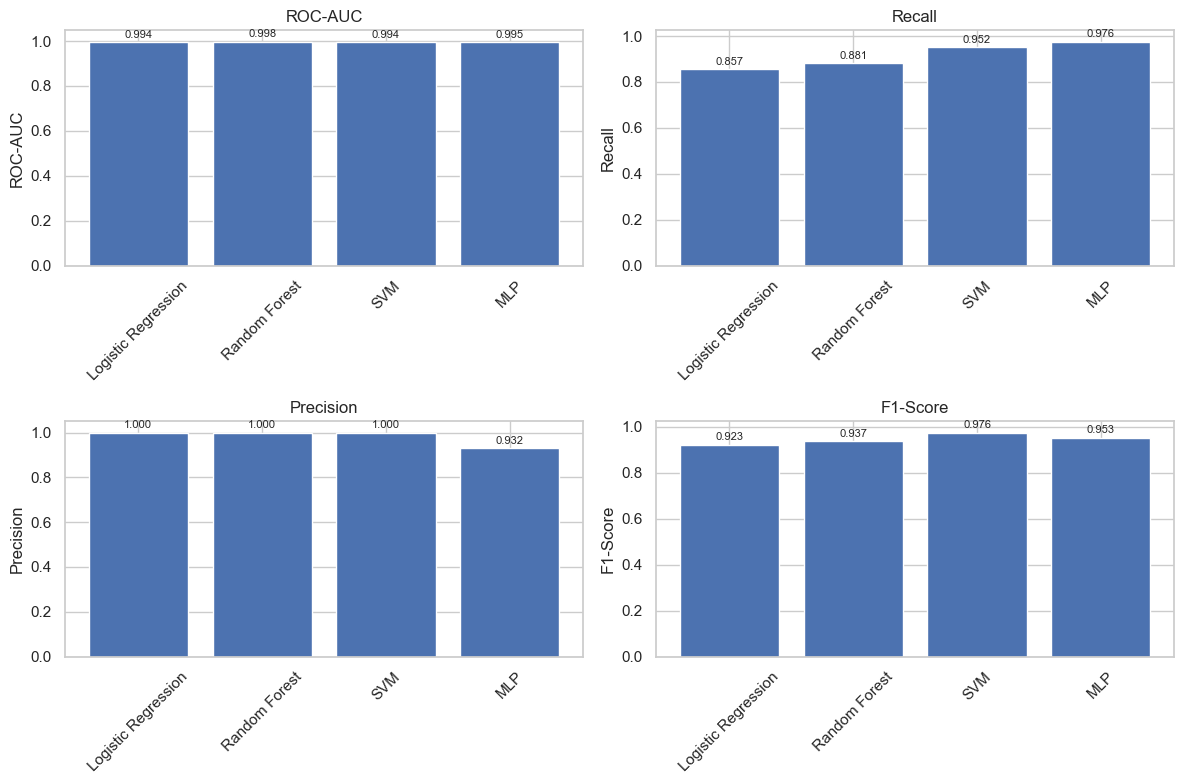

In [17]:
comparison_data = [{
    'Model': name,
    'CV ROC-AUC': f"{result['CV_ROC_AUC_mean']:.4f} ± {result['CV_ROC_AUC_std']:.4f}",
    'Test ROC-AUC': f"{result['Test_ROC_AUC']:.4f}",
    'Test Recall': f"{result['Test_Recall_optimal']:.4f}",
    'Test Precision': f"{result['Test_Precision_optimal']:.4f}",
    'Test F1': f"{result['Test_F1_optimal']:.4f}"
} for name, result in results.items()]

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

comparison_df.to_csv('results/model_comparison.csv', index=False)
comparison_df.to_json('results/model_comparison.json', orient='records', indent=2)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
metrics = ['Test_ROC_AUC', 'Test_Recall_optimal', 'Test_Precision_optimal', 'Test_F1_optimal']
titles = ['ROC-AUC', 'Recall', 'Precision', 'F1-Score']

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[idx // 2, idx % 2]
    values = [results[m][metric] for m in results.keys()]
    ax.bar(results.keys(), values)
    ax.set_title(title)
    ax.set_ylabel(title)
    ax.tick_params(axis='x', rotation=45)
    for i, v in enumerate(values):
        ax.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('results/plots/model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()


## 6. Deployment

In [18]:
best_model_name = max(results, key=lambda x: results[x]['Test_ROC_AUC'])
best_model = results[best_model_name]['Model']
best_threshold = optimal_thresholds[best_model_name]

joblib.dump(best_model, 'results/best_model.joblib')
joblib.dump(scaler, 'results/scaler.joblib')
joblib.dump(le, 'results/label_encoder.joblib')

with open('results/deployment_info.json', 'w') as f:
    json.dump({
        'model_name': best_model_name,
        'optimal_threshold': float(best_threshold),
        'test_metrics': {
            'roc_auc': float(results[best_model_name]['Test_ROC_AUC']),
            'recall_optimal': float(results[best_model_name]['Test_Recall_optimal']),
            'precision_optimal': float(results[best_model_name]['Test_Precision_optimal']),
            'f1_optimal': float(results[best_model_name]['Test_F1_optimal']),
            'accuracy_optimal': float(results[best_model_name]['Test_Accuracy_optimal'])
        },
        'feature_names': list(top_features),
        'class_mapping': {int(k): str(v) for k, v in enumerate(le.classes_)}
    }, f, indent=2)